Problem 2

In [152]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Importing the library for models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, zero_one_loss, confusion_matrix, log_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNC

In [153]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [185]:
# Importing the DataSet
from sklearn.datasets import load_wine
wine=load_wine()
data=pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
data['Wine'] = wine['target']+1

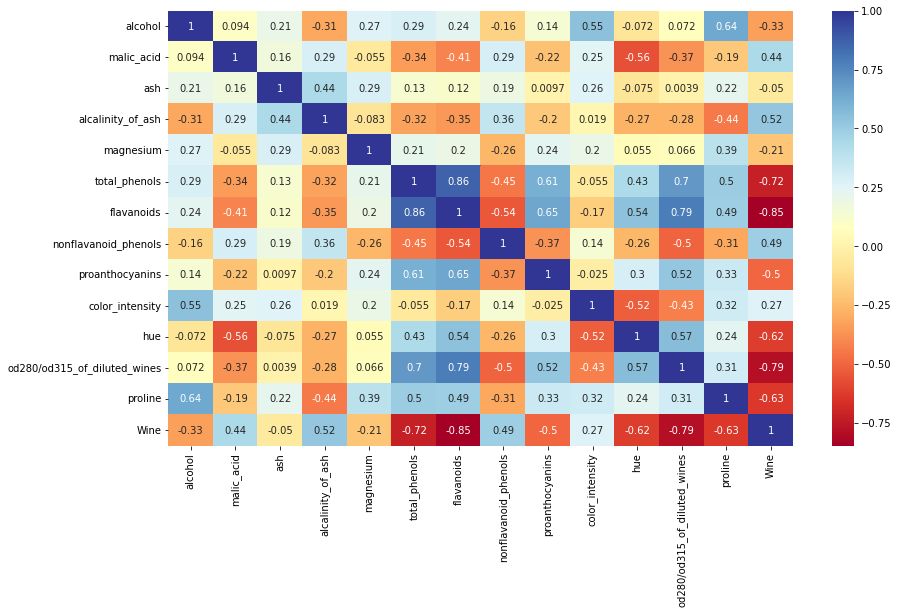

In [186]:
#ploting the heat map for checking corelation
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot = True, cmap="RdYlBu")
plt.show()

From the above heat map we can observe that flavanoids, diluted_wines, total_phenols are negatively correlated with Wine while alcalinity_of_asfh
nonflavanoid_phenols are positively correlated.



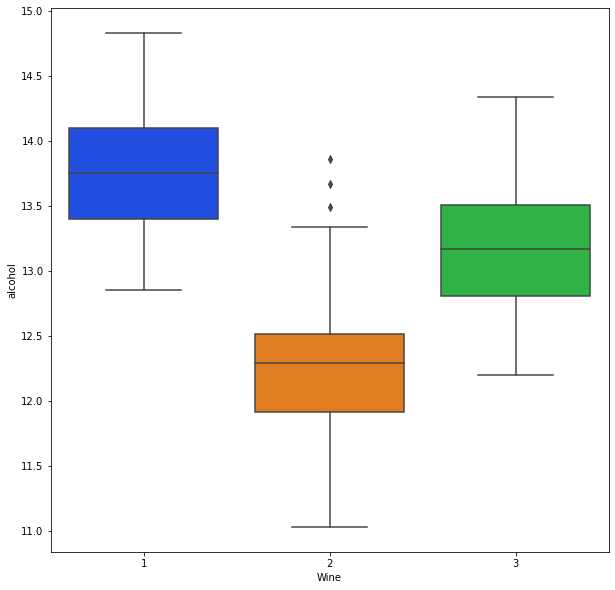

In [156]:
# Using boxplot to visualize features useful in predicting target variable
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['alcohol'], palette = "bright")
plt.show()

Observation:

Though in the correlation heatmap, we can see that the correlation between alcohol and Wine was just -0.33 but from the boxplot above we can still differentiate categories of wine based on alcohol concentration.

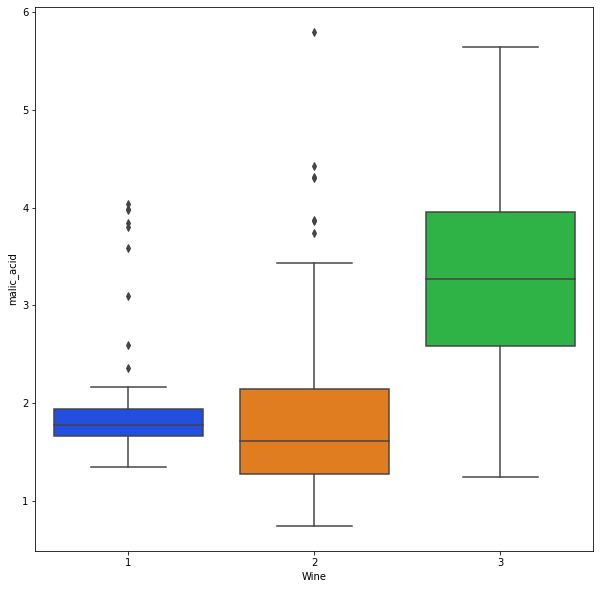

In [157]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['malic_acid'], palette = "bright")
plt.show()

Observation:

Though in the correlation heatmap, we can see that the correlation between malic_acid and Wine is 0.44 but from the boxplot above we can not differentiate between first two categories of Wine.

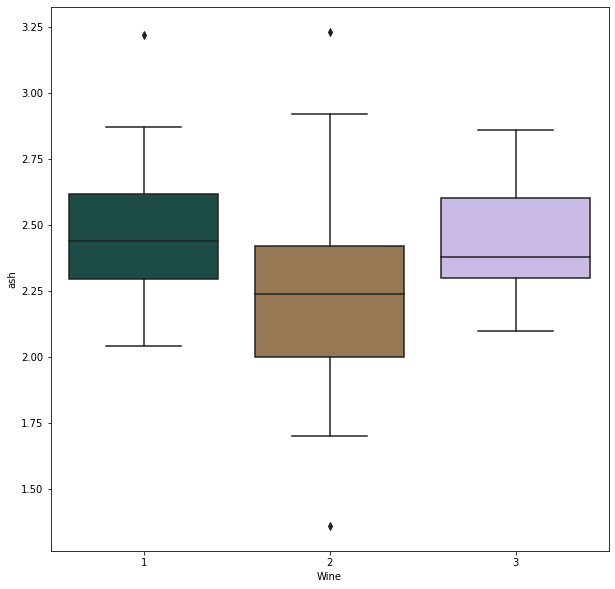

In [158]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['ash'], palette = "cubehelix")
plt.show()

Observation:

We could see from the observation that ash and Wine are not highly correlated as could be seen from the boxplot above.

In the correlation heatmap, we also see that the correlation between Wine and ash was just -0.05 respectively.

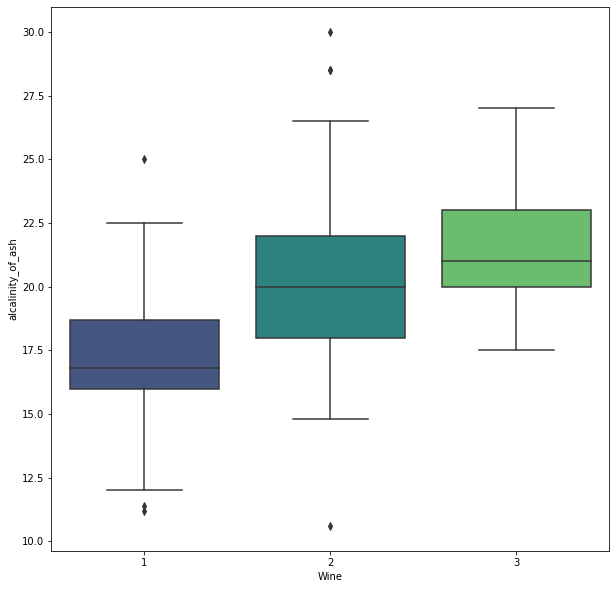

In [159]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['alcalinity_of_ash'], palette = "viridis")
plt.show()

Observation:

When we plot a boxplot for the alcalinity_of_ash feature, it clearly shows us that the values could be quite separated which would ensure that we get predictions for 'Wine' value respectively.

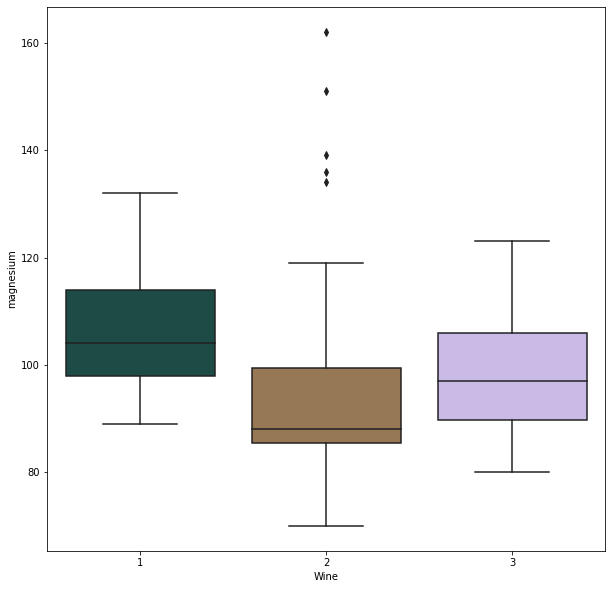

In [160]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['magnesium'], palette = "cubehelix")
plt.show()

Observation:

We could see from the observation that ash and Wine are not highly correlated as could be seen from the above box plot. 

Also, we are not able to differentiate between different categories of Wine since correlation between Wine and magnesium is just -0.21 respectively.



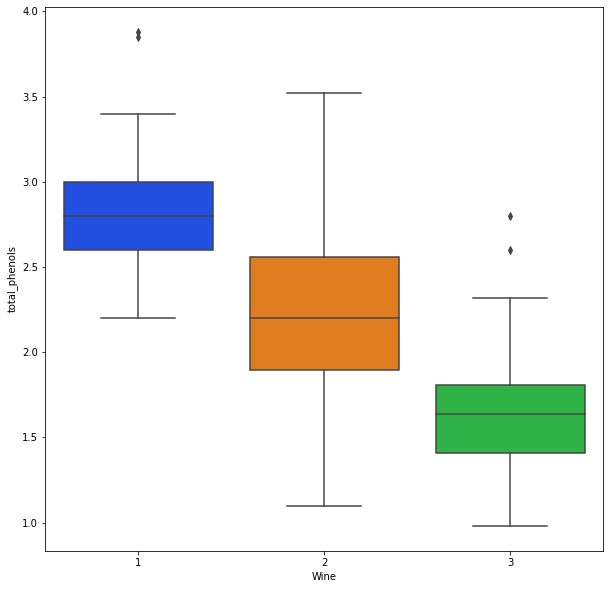

In [161]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['total_phenols'], palette = "bright")
plt.show()

Observation:

Here we could easily identify and distinguish the feature 'total_phenols' based on the 'Wine' values.

We've also seen the relationship using the correlation heatmap above which showed that the correlation between 'Wine' and 'total_phenols' is -0.75 respectively.

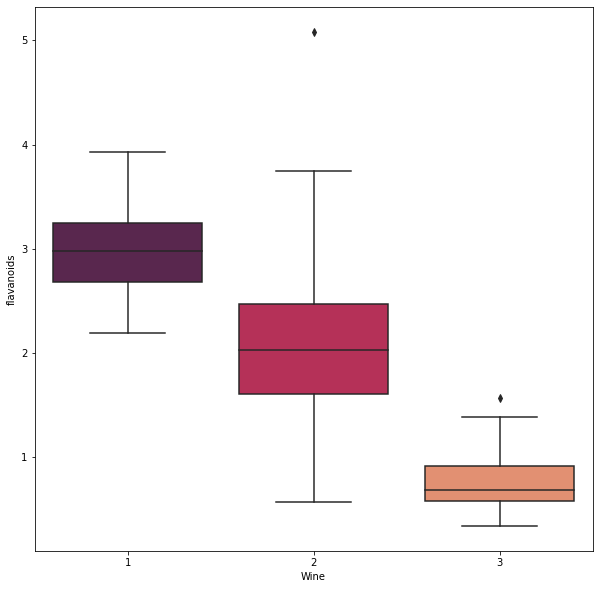

In [162]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['flavanoids'], palette = "rocket")
plt.show()

Observation:

Here we could easily identify and distinguish the feature 'flavanoids' based on the 'Wine' values. Therefore, this feature is highly correlated with the 'Wine' output variable.

We've also seen the relationship using the correlation heatmap above which showed that the correlation between 'Wine' and 'flavanoids' is -0.85  respectively.

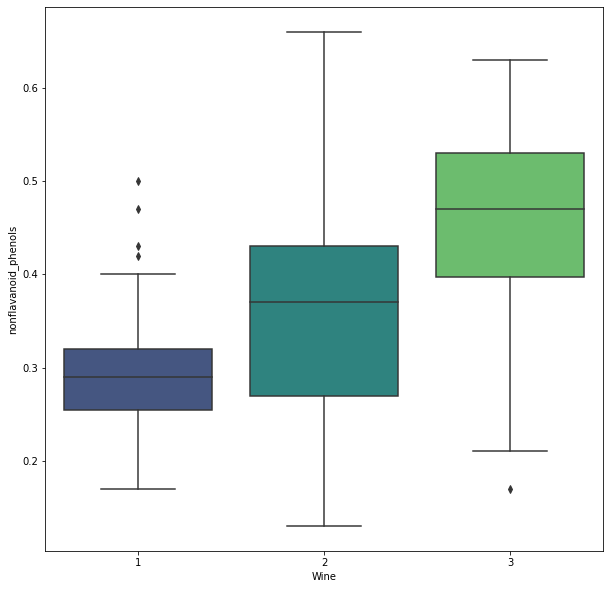

In [163]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['nonflavanoid_phenols'], palette = "viridis")
plt.show()

Observation:

Here we could easily identify and distinguish the feature 'nonflavanoid_phenols' based on the 'Wine' values.

We've also seen the relationship using the correlation heatmap above which showed that the correlation between 'Wine' and 'nonflavanoid_phenols' is 0.49 respectively.

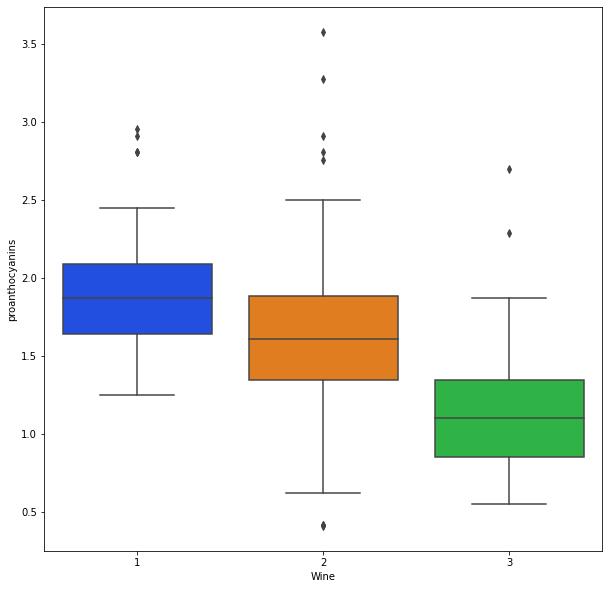

In [164]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['proanthocyanins'], palette = "bright")
plt.show()

Observation:

Here we could easily identify and distinguish the feature 'proanthocyanins' based on the 'Wine' values.

We've also seen the relationship using the correlation heatmap above which showed that the correlation between 'Wine' and 'proanthocyanins' is -0.5 respectively.

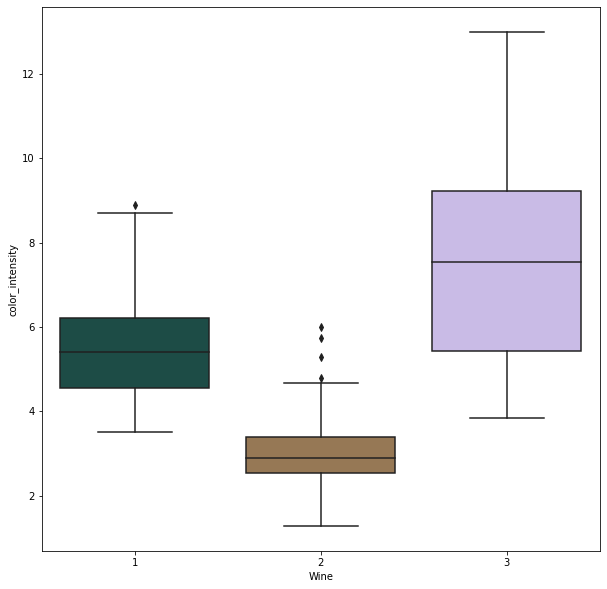

In [165]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['color_intensity'], palette = "cubehelix")
plt.show()

Observation:

Though in the correlation heatmap, we can see that the correlation between color_intensity and Wine was just 0.27 but from the boxplot above we can still differentiate categories of Wine.

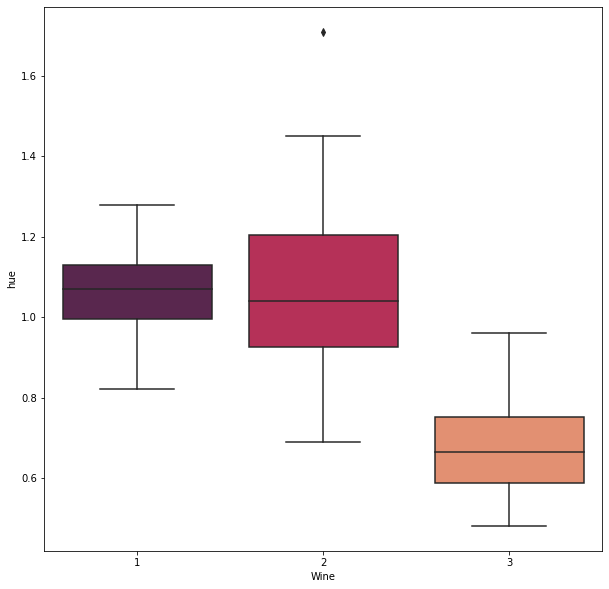

In [166]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['hue'], palette = "rocket")
plt.show()

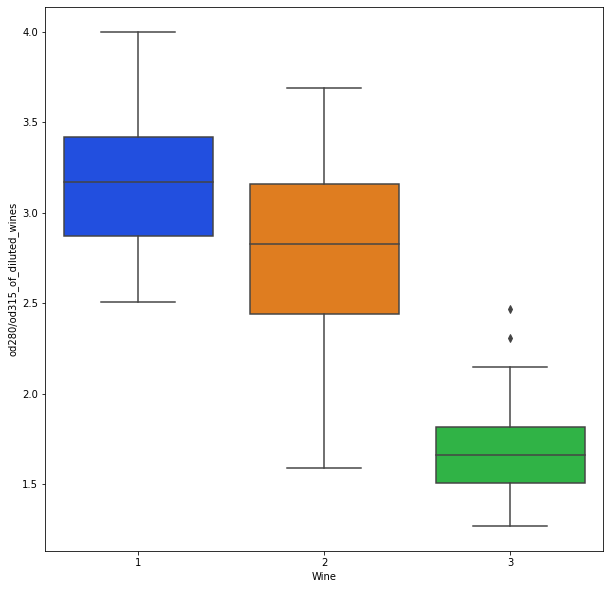

In [167]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['od280/od315_of_diluted_wines'], palette = "bright")
plt.show()

Observation:

Here also we could easily identify and distinguish the feature 'diluted_wines' based on the 'Wine' values. Therefore, this feature is highly correlated with the 'Wine' output variable and correlation between 'Wine' and 'diluted_wines' is -0.79 respectively.

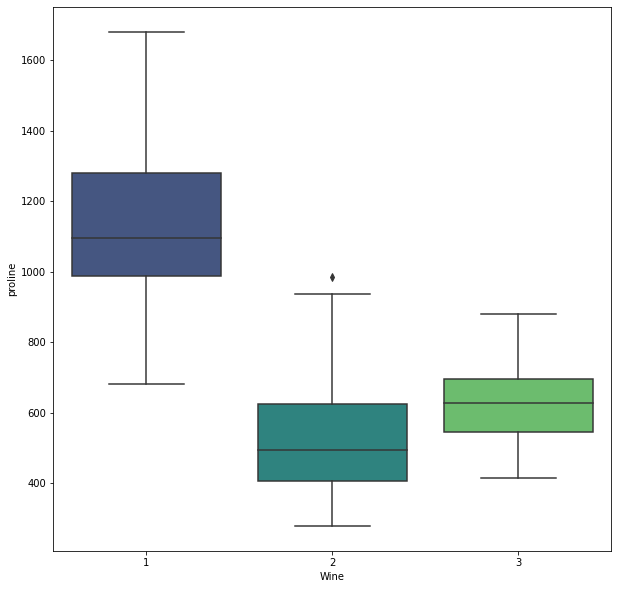

In [168]:
plt.figure(figsize = (10, 10))
sns.boxplot(data['Wine'], data['proline'], palette = "viridis")
plt.show()

Observation:

When we plot a boxplot for the proline feature, it clearly shows us that the   proline values could be quite separated which would ensure that we get predictions for 'Wine' value respectively.

Having a higher 'proline' signifies that 'Wine' is of first category.

(b) Useful findings:

Based on the above observations, we can conclude that alcohol, alcalinity_of_ash, total_phenols, flavanoids, nonflavanoid_phenols,
proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline are some of the important factors in predicting the 'Wine' output variable respectively.

In [187]:
# Columns not useful in model building are simply dropped
data.drop(['malic_acid','ash','magnesium'], axis=1, inplace=True)

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   alcalinity_of_ash             178 non-null    float64
 2   total_phenols                 178 non-null    float64
 3   flavanoids                    178 non-null    float64
 4   nonflavanoid_phenols          178 non-null    float64
 5   proanthocyanins               178 non-null    float64
 6   color_intensity               178 non-null    float64
 7   hue                           178 non-null    float64
 8   od280/od315_of_diluted_wines  178 non-null    float64
 9   proline                       178 non-null    float64
 10  Wine                          178 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 15.4 KB


In [189]:
#independent variables / explanatory variables
x = data.drop(labels='Wine', axis=1)  
#dependent variable / response / target variable.
y = data['Wine']

In [190]:
#splitting the dataset into 80%-20% train-test split 
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state=100)

In [191]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 100)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [192]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [193]:
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix of Logistic Regression Model on test set is: {}".format(cm))

The Confusion Matrix of Logistic Regression Model on test set is: [[ 8  0  0]
 [ 2 13  0]
 [ 0  0 13]]


In [194]:
print("The Accuracy of Logistic Regression Model on test set is : {}%".format(np.round(accuracy_score(y_pred, y_test) * 100, 2)))

The Accuracy of Logistic Regression Model on test set is : 94.44%


In [195]:
print("The zero-one loss of Logistic Regression Model on test set is : {}".format(zero_one_loss(y_pred, y_test)))

The zero-one loss of Logistic Regression Model on test set is : 0.05555555555555558


(d) *The test error of the Logistic Regression Model obtained is : 0.05555555555555558*

In [196]:
model = LDA()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [197]:
y_test_predictions = model.predict(X_test)

In [198]:
cm = confusion_matrix(y_test, y_test_predictions)
print("The Confusion Matrix of Linear Discriminant Analysis Model on test set is: {}".format(cm))

The Confusion Matrix of Linear Discriminant Analysis Model on test set is: [[ 8  0  0]
 [ 0 15  0]
 [ 0  0 13]]


In [199]:
print("The Accuracy of Linear Discriminant Analysis Model on Test Set is : {}%".format(np.round(accuracy_score(y_test_predictions, y_test) * 100, 2)))

The Accuracy of Linear Discriminant Analysis Model on Test Set is : 100.0%


In [200]:
print("The zero-one loss of Linear Discriminant Analysis Model on test set is : {}".format(zero_one_loss(y_test_predictions, y_test)))

The zero-one loss of Linear Discriminant Analysis Model on test set is : 0.0


(e) *The test error of the model obtained using Linear Discriminant Analysis is : 0.0*

In [202]:
K_values = [ 2, 3, 5, 7, 9, 11, 13, 15]
Zero_one_loss_list = []
for i in K_values:
    model = KNC(n_neighbors = i)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    print("For K = {}".format(i))
    print("The Accuracy of K Nearest Classifier (K = {}) on test Set is : {}%".format(i, np.round(accuracy_score(y_test_pred, y_test) * 100, 2)))
    print("The zero_one loss of K Nearest Classifier (K = {}) on test set is : {}".format(i, zero_one_loss(y_test_pred, y_test)))
    Zero_one_loss_list.append(zero_one_loss(y_test_pred, y_test))
    print("\n")

For K = 2
The Accuracy of K Nearest Classifier (K = 2) on test Set is : 63.89%
The zero_one loss of K Nearest Classifier (K = 2) on test set is : 0.36111111111111116


For K = 3
The Accuracy of K Nearest Classifier (K = 3) on test Set is : 72.22%
The zero_one loss of K Nearest Classifier (K = 3) on test set is : 0.2777777777777778


For K = 5
The Accuracy of K Nearest Classifier (K = 5) on test Set is : 69.44%
The zero_one loss of K Nearest Classifier (K = 5) on test set is : 0.3055555555555556


For K = 7
The Accuracy of K Nearest Classifier (K = 7) on test Set is : 63.89%
The zero_one loss of K Nearest Classifier (K = 7) on test set is : 0.36111111111111116


For K = 9
The Accuracy of K Nearest Classifier (K = 9) on test Set is : 61.11%
The zero_one loss of K Nearest Classifier (K = 9) on test set is : 0.38888888888888884


For K = 11
The Accuracy of K Nearest Classifier (K = 11) on test Set is : 61.11%
The zero_one loss of K Nearest Classifier (K = 11) on test set is : 0.38888888888

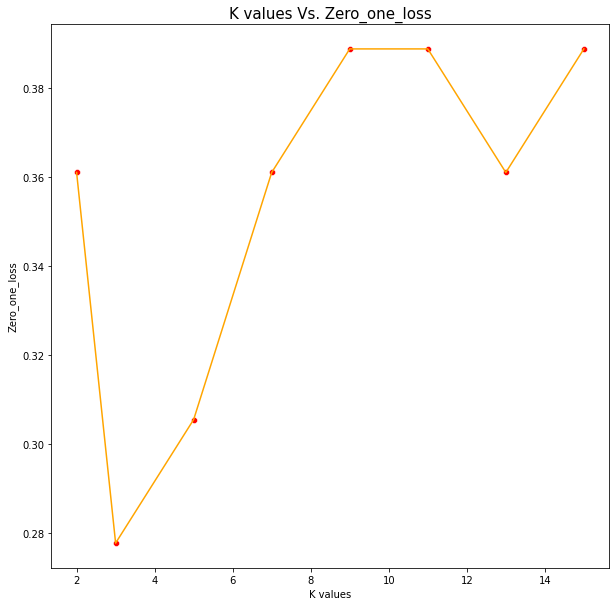

In [203]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = K_values, y = Zero_one_loss_list, color = 'orange')
sns.scatterplot(x = K_values, y = Zero_one_loss_list, color = 'red')
plt.title("K values Vs. Zero_one_loss", fontsize = 15)
plt.xlabel("K values")
plt.ylabel("Zero_one_loss")
plt.show()

(f) **Based on the observations and if we take Zero_one_loss as the metric, the best value of K for this dataset is 3**

**Problem 4**

In [ ]:
# Importing the DataSet
df_amazon = pd.read_csv("amazon_bs_20102020.csv")

In [ ]:
# Reading the head of the dataset and analysizing the attribute
df_amazon.head()

,Year,Rank,Book_Title,Author,Rating,Num_Customers_Rated,Price
0,2010,1,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,8475,17.24
1,2010,2,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,11516,9.99
2,2010,3,Decision Points,George W. Bush,4.6,2201,17.80
3,2010,4,The Help,Kathryn Stockett,4.8,14772,14.97
4,2010,5,The Girl Who Played with Fire (Millennium Series),Stieg Larsson,4.7,7949,0.02


In [ ]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1094 non-null   int64  
 1   Rank                 1094 non-null   int64  
 2   Book_Title           1094 non-null   object 
 3   Author               1094 non-null   object 
 4   Rating               1094 non-null   float64
 5   Num_Customers_Rated  1094 non-null   int64  
 6   Price                1094 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.0+ KB


In [ ]:
# Columns not useful in statistical analysis are simply dropped
df_amazon.drop(['Year','Rank','Book_Title','Author','Num_Customers_Rated'], axis=1 , inplace=True)

In [ ]:
df_amazon.columns

Index(['Rating', 'Price'], dtype='object')

In [ ]:
df_predictor = df_amazon['Price']

In [ ]:
num_of_obvs = df_predictor.shape[0]

In [ ]:
price_population_mean = np.mean(df_predictor)
print("The population mean of Price µ:  {}".format(price_population_mean))

The population mean of Price µ:  10.850950639853746


(a) *An estimate for the population mean of Price µ is 10.850950639853746*

In [ ]:
price_standard_error = np.std(df_predictor)/np.sqrt(num_of_obvs)
print("The standard error of Price µ:  {}".format(price_standard_error))

The standard error of Price µ:  0.35858300263084725


(b) *An estimate of the standard error of Price µ: 0.35858300263084725*

Standard error measures the accuracy with which a sample distribution represents a population by using standard deviation. In other terms it represents difference of sample mean from the population one

In [ ]:
from sklearn import utils
sampled_mean_sets = []
num_of_samps = len(df_predictor)
for i in range(1000):
  resampled_sets = utils.resample(df_predictor, n_samples = num_of_obvs)
  sampled_mean_sets.append(np.mean(resampled_sets))

In [ ]:
bootstrap_standard_error = np.std(sampled_mean_sets)
print("The standard error obtained from all the bootstrap samples:  {}".format(bootstrap_standard_error))

The standard error obtained from all the bootstrap samples:  0.36816000054348613


(c) *An estimate of the standard error obtained from all the bootstrap samples :  0.36816000054348613*

There is not much significant difference between the errors obtained from sample standard deviation and from the bootstrap samples

In [ ]:
confidence_interval = [price_population_mean - 2*bootstrap_standard_error, price_population_mean + 2*bootstrap_standard_error]
print(" The confidence interval lies in the range:  {}".format(confidence_interval))

 The confidence interval lies in the range:  [10.114630638766775, 11.587270640940718]


In [ ]:
import scipy
scipy_interval = scipy.stats.norm.interval(alpha = 0.95, loc =price_population_mean, scale =bootstrap_standard_error)
print(" The 95% confidence applied to Price:  {}".format(scipy_interval))

 The 95% confidence applied to Price:  (10.129370298240266, 11.572530981467226)


(d) Useful findings:

The confidence interval obtained from both the scipy library and from the manual calculation are quite close to each other. Therefore, we can infer that if sufficent no. of samples are available population mean can be generated using bootstrap sampling

In [ ]:
quantile_25_price = np.quantile(df_predictor, q = 0.25)
print(" The first 25% quantile of Price:  {}".format(quantile_25_price))

 The first 25% quantile of Price:  2.75


(e) *The first 25% quantile of Price:  2.75*

In [ ]:
sample_quantile_25th_percentile = []
num_of_samps = len(df_predictor)
for i in range(1000):
  resampled_sets = utils.resample(df_predictor, n_samples = num_of_obvs)
  sample_quantile_25th_percentile.append(np.quantile(a = resampled_sets, q = 0.25))

In [ ]:
print("The standard error obtained from the samples of 25th quantile is:  {}".format(np.std(sample_quantile_25th_percentile)))

The standard error obtained from the samples of 25th quantile is:  0.3762459374863734


(e) Observation:

The standard error of the first quantile using the bootstrap came out to be about  0.3762 which is significantly lesser than the standard error of the individual mean of bootstrap samples.

From the above findings it is evident that 25th percentile values can be found out more accurately than 50th percentile from the population mean.

In [ ]:
df_amazon.shape[0]

1094

In [ ]:
from sklearn.linear_model import LinearRegression
β0_values = []
β1_values = []
num_of_obvs = len(df_amazon)
for i in range(1000):
  resampled_sets = utils.resample(df_amazon, n_samples = num_of_obvs)
  X = resampled_sets['Rating'].to_numpy().reshape(-1, 1)
  y = resampled_sets['Price'].to_numpy().reshape(-1, 1)
  model = LinearRegression()
  model.fit(X,y)
  β0_values.append(model.intercept_[0])
  β1_values.append(model.coef_[0][0])

In [ ]:
β0_standard_error = np.std(β0_values)
β1_standard_error = np.std(β1_values)
print(" The standard error of the β0 values obtained using the bootstrap samples is:  {}".format(β0_standard_error))
print(" The standard error of the β1 values obtained using the bootstrap samples is:  {}".format(β1_standard_error))

 The standard error of the β0 values obtained using the bootstrap samples is:  6.938898007281044
 The standard error of the β1 values obtained using the bootstrap samples is:  1.4806353988796361


In [ ]:
X = df_amazon['Rating']
y = df_amazon['Price']

In [ ]:
β0_stderr_linregress = scipy.stats.linregress(X, y).intercept_stderr
β1_stderr_lingress = scipy.stats.linregress(X,y).stderr
print(" The standard error of the β0 values obtained using linregress is:  {}".format(β0_stderr_linregress))
print(" The standard error of the β1 values obtained using linregress is:  {}".format(β1_stderr_lingress))

 The standard error of the β0 values obtained using linregress is:  7.558746805421322
 The standard error of the β1 values obtained using linregress is:  1.6302666162338253


(g) Findings:

The standard error values obtained as a result of Lineregress for β0 and β1
are quite close to the values that are obtained as a result of fitting bootstrap samples to the linear regression model.